<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#그래프 한글 출력을 위한 코드
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf
#!pip install git+https://github.com/python-visualization/branca.git@master

In [1]:
# 경고처리
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
movies = pd.read_csv('/content/drive/MyDrive/21-2/ESAA/movies_train.csv')
movies.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [4]:
# 결측치 처리
movies['dir_prev_bfnum'].fillna(0, inplace=True)
# datetime 형 변환
movies['release_time']=pd.to_datetime(movies['release_time'])

In [5]:
#배급사별 관객수의 평균이 높은 순
dis_mean = movies.groupby('distributor').mean().sort_values(by='box_off_num', ascending=False) 
dis_mean.reset_index(inplace=True)
dis_mean = dis_mean.head(10)
dis_mean

,distributor,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,CJ E&M Pictures,115.000000,4.111671e+06,0.500000,335.000000,8.000000,4.122337e+06
1,(주)쇼박스,126.538462,1.370236e+06,1.807692,360.384615,3.923077,3.386656e+06
2,(주)아이필름코퍼레이션,121.000000,7.250000e+01,2.000000,458.000000,3.000000,3.117859e+06
3,쇼박스(주)미디어플렉스,111.500000,5.000000e-01,0.500000,293.000000,2.500000,2.634823e+06
4,영구아트무비,103.000000,7.855474e+06,1.000000,31.000000,5.000000,2.541603e+06
5,CJ E&M 영화부문,111.000000,2.163222e+06,2.000000,112.333333,3.000000,2.505309e+06
6,(주)NEW,112.033333,1.033694e+06,1.366667,277.266667,4.133333,2.184405e+06
7,CJ 엔터테인먼트,111.370370,8.911291e+05,1.481481,313.629630,3.777778,2.162742e+06
8,이십세기폭스코리아(주),117.666667,7.460766e+05,2.000000,194.000000,4.333333,1.637046e+06
9,SK텔레콤(주),111.000000,0.000000e+00,0.000000,410.000000,4.000000,1.383867e+06


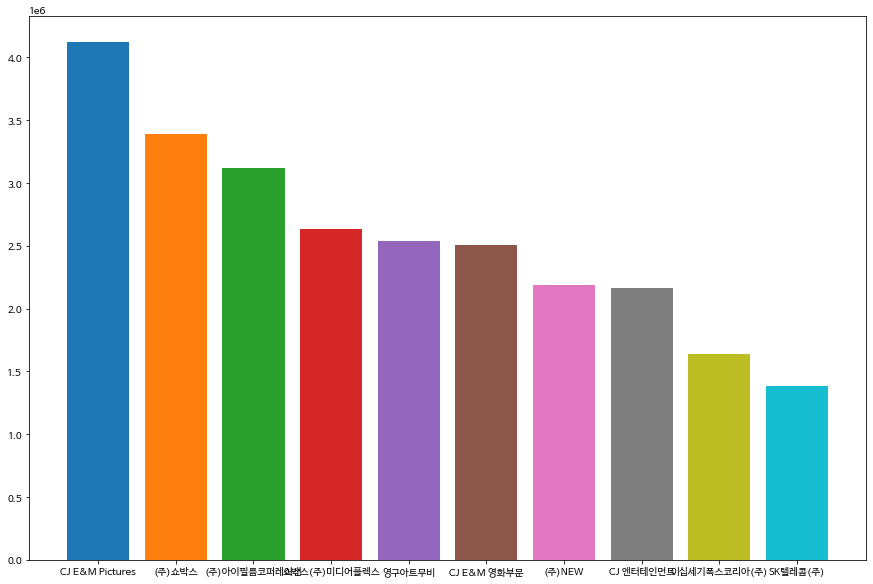

In [6]:
plt.figure(figsize=(15, 10))
plt.rc('font', family='NanumBarunGothic', size=10)
plt.bar(dis_mean['distributor'], dis_mean['box_off_num'], color=['C'+str(i) for i in range(10)])
plt.xticks(dis_mean['distributor'])
plt.show()

In [7]:
#감독별 관객수의 평균이 높은 순
director_mean = movies.groupby('director').mean().sort_values(by='box_off_num', ascending=False) 
director_mean.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
director,,,,,,
윤제균,126.0,0.000000e+00,0.0,869.0,4.0,14262766.0
최동훈,137.0,3.867085e+06,3.5,545.0,6.5,12845252.0
양우석,127.0,0.000000e+00,0.0,311.0,5.0,11374879.0
봉준호,125.0,0.000000e+00,0.0,67.0,10.0,9350351.0
한재림,139.0,1.242778e+06,2.0,298.0,6.0,9135806.0


In [8]:
bestTen = movies.sort_values(by='box_off_num', ascending=False)[:10]    #최고 흥행작 10편
bestTen.reset_index(inplace=True)
bestTen.drop(['index', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff'], axis=1, inplace=True)
bestTen

,title,distributor,genre,release_time,time,screening_rat,director,num_actor,box_off_num
0,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,4,14262766
1,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,10,12983841
2,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,8,12811435
3,암살,(주)쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,3,12706663
4,"광해, 왕이 된 남자",CJ 엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,3,12323595
5,변호인,(주)NEW,드라마,2013-12-18,127,15세 관람가,양우석,5,11374879
6,설국열차,CJ 엔터테인먼트,SF,2013-08-01,125,15세 관람가,봉준호,10,9350351
7,관상,(주)쇼박스,드라마,2013-09-11,139,15세 관람가,한재림,6,9135806
8,해적: 바다로 간 산적,롯데엔터테인먼트,SF,2014-08-06,130,12세 관람가,이석훈,2,8666208
9,수상한 그녀,CJ 엔터테인먼트,코미디,2014-01-22,124,15세 관람가,황동혁,5,8659725


In [9]:
bestGenre = movies.groupby('genre').mean().sort_values(by='box_off_num', ascending=False)   #관객수로 알아보는 선호 장르
bestGenre.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
genre,,,,,,
느와르,115.370370,7.749172e+05,1.296296,311.074074,3.592593,2.263695e+06
액션,114.464286,1.061149e+06,1.857143,337.535714,3.607143,2.203974e+06
SF,101.384615,1.238218e+06,1.307692,197.307692,3.692308,1.788346e+06
코미디,105.264151,9.466686e+05,1.094340,209.075472,4.735849,1.193914e+06
드라마,104.651584,3.673737e+05,0.814480,164.484163,3.647059,6.256898e+05


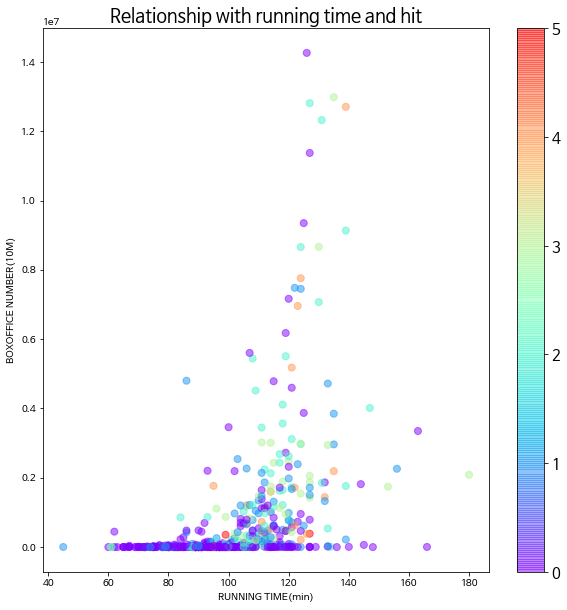

In [10]:
# 러닝타임과 관객수의 관계 산점도 + 전작 수(dir_prev_num) 

plt.figure(figsize=(10, 10))
plt.scatter(movies['time'], movies['box_off_num'], c=movies['dir_prev_num'], cmap='rainbow', alpha=0.5, s=50)
plt.rc('font', size=15)
plt.xlabel('RUNNING TIME(min)')
plt.ylabel('BOXOFFICE NUMBER(10M)')
plt.colorbar()
plt.title('Relationship with running time and hit')
plt.show()